In [1]:
import pandas as pd
import glob
import os
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
file1 = "../data/Norfolk/Norfolk/summary_results_algorithm_Norfolk_AMY.csv"
df_meta = pd.read_csv(file1)
df_meta

aggregate_n_runs = 6*24 # number of datapoints 
reporting_datapoints = int(365 * (6*24)/aggregate_n_runs) # number of datapoints for a year

In [6]:
file2 = "Norfolk.csv"
df_results = pd.read_csv(file2)

new_columns = df_results.columns[0].split("output_test")[1].split("_sensors.csv")[:-1]
df_results = pd.DataFrame(df_results.values.reshape(int(len(df_results.values)/reporting_datapoints),reporting_datapoints)).T
df_results.columns = new_columns
df_results

,11ce6ed7-03e1-426d-adbb-04a8011d767f,3f9c38dd-02c2-47bf-945c-ae401017ccae,655d9c80-14e6-4f80-a6f1-711b2ff0f9e5,6961fa68-66ce-42fd-9161-0fcb37bfa0bd,843c0271-ddb1-4cf3-972c-b9f0524d4fb8,912040e6-d307-410e-8321-e71e49c0c615,a5566c06-690a-47dc-8a6e-9f695eae8ea0,e0baeb44-227c-4374-9c14-6693f3f6c9b1,e1598de2-3062-4f40-b343-05defbd8c32c
0,lighting_setback_error_early_termination,lighting_setback_error_early_termination,lighting_setback_error_early_termination,lighting_setback_error_early_termination,lighting_setback_error_early_termination,lighting_setback_error_early_termination,lighting_setback_error_early_termination,lighting_setback_error_early_termination,lighting_setback_error_early_termination
1,hvac_setback_error_delayed_onset,condenser_fouling_in_chiller,thermostat_bias,condenser_fouling_in_chiller,condenser_fouling_in_chiller,supply_air_duct_leakages,excessive_infiltration,excessive_infiltration,condenser_fouling_in_chiller
2,hvac_setback_error_delayed_onset,lighting_setback_error_early_termination,thermostat_bias,nonstandard_refrigerant_charging_in_chiller,condenser_fouling_in_chiller,supply_air_duct_leakages,improperly_sized_equipment_wshp,improperly_sized_equipment_wshp,nonstandard_refrigerant_charging_in_chiller
3,hvac_setback_error_delayed_onset,lighting_setback_error_early_termination,thermostat_bias,condenser_fouling_in_chiller,condenser_fouling_in_chiller,supply_air_duct_leakages,improperly_sized_equipment_wshp,condenser_fouling_in_chiller,condenser_fouling_in_chiller
4,hvac_setback_error_delayed_onset,lighting_setback_error_early_termination,thermostat_bias,nonstandard_refrigerant_charging_in_chiller,condenser_fouling_in_chiller,supply_air_duct_leakages,improperly_sized_equipment_wshp,condenser_fouling_in_chiller,condenser_fouling_in_chiller
...,...,...,...,...,...,...,...,...,...
360,hvac_setback_error_delayed_onset,lighting_setback_error_early_termination,thermostat_bias,presence_of_noncondensable_in_chiller,condenser_fouling_in_chiller,supply_air_duct_leakages,improperly_sized_equipment_wshp,excessive_infiltration,nonstandard_refrigerant_charging_in_chiller
361,hvac_setback_error_delayed_onset,lighting_setback_error_early_termination,thermostat_bias,presence_of_noncondensable_in_chiller,condenser_fouling_in_chiller,supply_air_duct_leakages,condenser_fouling_in_chiller,excessive_infiltration,nonstandard_refrigerant_charging_in_chiller
362,hvac_setback_error_delayed_onset,lighting_setback_error_early_termination,thermostat_bias,nonstandard_refrigerant_charging_in_chiller,condenser_fouling_in_chiller,supply_air_duct_leakages,improperly_sized_equipment_wshp,excessive_infiltration,nonstandard_refrigerant_charging_in_chiller
363,hvac_setback_error_delayed_onset,lighting_setback_error_early_termination,thermostat_bias,presence_of_noncondensable_in_chiller,condenser_fouling_in_chiller,supply_air_duct_leakages,condenser_fouling_in_chiller,excessive_infiltration,improperly_sized_equipment_wshp


In [7]:
df_diagnosis = []

for bldgid in df_results.columns:
    
    print()

    temp = pd.DataFrame(df_results[bldgid].groupby(df_results[bldgid]).count())
    temp.columns = ['counts']
    temp = temp.sort_values(by='counts', ascending=False)
    diagnose_fault = temp.iloc[0:1].index[0]
    diagnose_pcnt = (temp.iloc[0:1].counts.values[0])/(temp.sum().values[0])
    groundtruth = df_meta.loc[df_meta.id==bldgid, :].fault_type.values[0]
    
    df_diagnosis.append([bldgid, groundtruth, diagnose_fault, diagnose_pcnt])
    
    
    print(f"Ground Truth = {groundtruth} || Diagnosis = {diagnose_fault}")
    
df_diagnosis = pd.DataFrame(df_diagnosis)
df_diagnosis.columns = ['id','GroundTruth','DiagnosedFault','ConfidenceRatio']
df_diagnosis = df_diagnosis.sort_values(by='ConfidenceRatio',ascending=False)
df_diagnosis


Ground Truth = hvac_setback_error_delayed_onset || Diagnosis = hvac_setback_error_delayed_onset

Ground Truth = lighting_setback_error_early_termination || Diagnosis = lighting_setback_error_early_termination

Ground Truth = thermostat_bias || Diagnosis = thermostat_bias

Ground Truth = presence_of_noncondensable_in_chiller || Diagnosis = presence_of_noncondensable_in_chiller

Ground Truth = condenser_fouling_in_chiller || Diagnosis = condenser_fouling_in_chiller

Ground Truth = supply_air_duct_leakages || Diagnosis = supply_air_duct_leakages

Ground Truth = improperly_sized_equipment_wshp || Diagnosis = improperly_sized_equipment_wshp

Ground Truth = excessive_infiltration || Diagnosis = excessive_infiltration

Ground Truth = nonstandard_refrigerant_charging_in_chiller || Diagnosis = nonstandard_refrigerant_charging_in_chiller


,id,GroundTruth,DiagnosedFault,ConfidenceRatio
2,655d9c80-14e6-4f80-a6f1-711b2ff0f9e5,thermostat_bias,thermostat_bias,0.997260
5,912040e6-d307-410e-8321-e71e49c0c615,supply_air_duct_leakages,supply_air_duct_leakages,0.991781
0,11ce6ed7-03e1-426d-adbb-04a8011d767f,hvac_setback_error_delayed_onset,hvac_setback_error_delayed_onset,0.964384
1,3f9c38dd-02c2-47bf-945c-ae401017ccae,lighting_setback_error_early_termination,lighting_setback_error_early_termination,0.926027
4,843c0271-ddb1-4cf3-972c-b9f0524d4fb8,condenser_fouling_in_chiller,condenser_fouling_in_chiller,0.789041
7,e0baeb44-227c-4374-9c14-6693f3f6c9b1,excessive_infiltration,excessive_infiltration,0.605479
6,a5566c06-690a-47dc-8a6e-9f695eae8ea0,improperly_sized_equipment_wshp,improperly_sized_equipment_wshp,0.600000
8,e1598de2-3062-4f40-b343-05defbd8c32c,nonstandard_refrigerant_charging_in_chiller,nonstandard_refrigerant_charging_in_chiller,0.487671
3,6961fa68-66ce-42fd-9161-0fcb37bfa0bd,presence_of_noncondensable_in_chiller,presence_of_noncondensable_in_chiller,0.400000


In [8]:
df_diagnosis.to_csv("./output.csv")

Log file processing

In [2]:
logfile = "log.csv"
logdf = pd.read_csv(logfile)
logdf

,randomseed,weather,labeling methodology,feature selection methodology,number of trees,aggregate n runs,training CDDR,testing CDDR
0,953,Norfolk,Simple,Embedded,4,144,0.904110,0.111111
1,1163,Norfolk,Simple,Embedded,4,144,0.903349,0.108067
2,3004,Norfolk,Simple,Embedded,4,144,0.915906,0.114155
3,5493,Norfolk,Simple,Embedded,4,144,0.905251,0.108067
4,3313,Norfolk,Simple,Embedded,4,144,0.916286,0.109589
5,7861,Norfolk,Simple,Embedded,20,144,0.994673,0.112633
6,1492,Norfolk,Simple,Embedded,20,144,0.996575,0.111111
7,6871,Norfolk,Simple,Embedded,20,144,0.993912,0.109589
8,1027,Norfolk,Simple,Embedded,20,144,0.993151,0.109589
9,3629,Norfolk,Simple,Embedded,20,144,0.993531,0.109589


In [3]:
treedf = logdf[(logdf['number of trees']==400) | (logdf['number of trees']==4)]
treedf

,randomseed,weather,labeling methodology,feature selection methodology,number of trees,aggregate n runs,training CDDR,testing CDDR
0,953,Norfolk,Simple,Embedded,4,144,0.904110,0.111111
1,1163,Norfolk,Simple,Embedded,4,144,0.903349,0.108067
2,3004,Norfolk,Simple,Embedded,4,144,0.915906,0.114155
3,5493,Norfolk,Simple,Embedded,4,144,0.905251,0.108067
4,3313,Norfolk,Simple,Embedded,4,144,0.916286,0.109589
14,1514,Norfolk,Simple,Embedded,400,144,0.997336,0.108067
15,308,Norfolk,Simple,Embedded,400,144,0.997336,0.111111
16,5055,Norfolk,Simple,Embedded,400,144,0.997336,0.111111
17,8494,Norfolk,Simple,Embedded,400,144,0.997336,0.108067
18,9650,Norfolk,Simple,Embedded,400,144,0.997336,0.112633


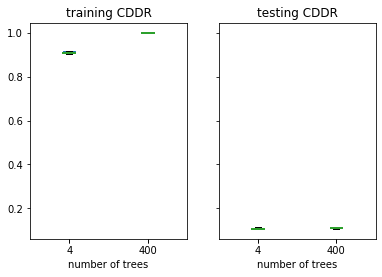

In [11]:
import matplotlib.pyplot as plt
medianprops = dict(linestyle='-', linewidth=2, color='k')
#boxprops = dict(linestyle='-', linewidth=2, color='r')
boxplot = treedf.boxplot(column=['training CDDR', 'testing CDDR'], 
                        by='number of trees', 
                        grid=False, 
                        return_type='axes',
                        medianprops=medianprops)
plt.suptitle('')
plt.show()